# Imports

In [1]:
import sys
sys.path.append("../scripts/")

In [2]:
from utils import DataLoader
from cleaning import CleanDataFrame
from exploration import Analysis
from visualization import Plotters

loader = DataLoader("../data", "data.csv")
cleaner = CleanDataFrame()
analyzer = Analysis()
plotters = Plotters(w=9, h=7)



['/home/hat/dev-env/10Acadamy/week_8/causal-inference/notebooks', '/home/hat/.vscode/extensions/ms-toolsai.jupyter-2022.5.1001601848/pythonFiles', '/home/hat/.vscode/extensions/ms-toolsai.jupyter-2022.5.1001601848/pythonFiles/lib/python', '/home/hat/miniconda3/envs/causality/lib/python38.zip', '/home/hat/miniconda3/envs/causality/lib/python3.8', '/home/hat/miniconda3/envs/causality/lib/python3.8/lib-dynload', '', '/home/hat/.local/lib/python3.8/site-packages', '/home/hat/dev-env/trading_sentiment/working_on/Pyramid/projects/static_assets', '/home/hat/dev-env/trading_sentiment/working_on/Mooner-Web-UI', '/home/hat/miniconda3/envs/causality/lib/python3.8/site-packages', '../scripts/', '../']


In [3]:
data = loader.read_csv()
data.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The only column with null values is the `Unnamed: 32`. I will just drop it.
I also don't need the id column. This is because it is just a unique identifier.

In [5]:
data.drop(columns=['Unnamed: 32', 'id'], inplace=True)

In [6]:
cleaner.percent_missing(data)

The dataset contains 0.0 % missing values.


Bellow here I will examine the shape of the table.

In [7]:
analyzer.print_shape(data)

The dataframe has 31 columns and 569 rows


# Univariate Analysis

In [8]:
analyzer.get_univariate_analysis(data).style.bar(subset=['mean'], color='#205ff2')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')



* There is high variation in values in area_mean and area_worst.
* The area_worst feature’s max value is 4254 and fractal_dimension_se features’ max 0.029840. This indicates we need to standardize or normalize data before visualization, feature selection, and classification.

## Distribution of the diagnosis

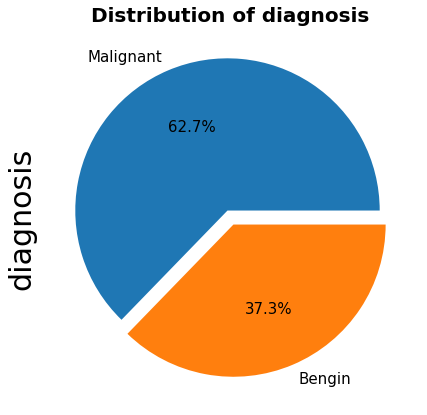

In [9]:
plotters.plot_count(data, column='diagnosis', kind="pie")

## Multivariate Analysis

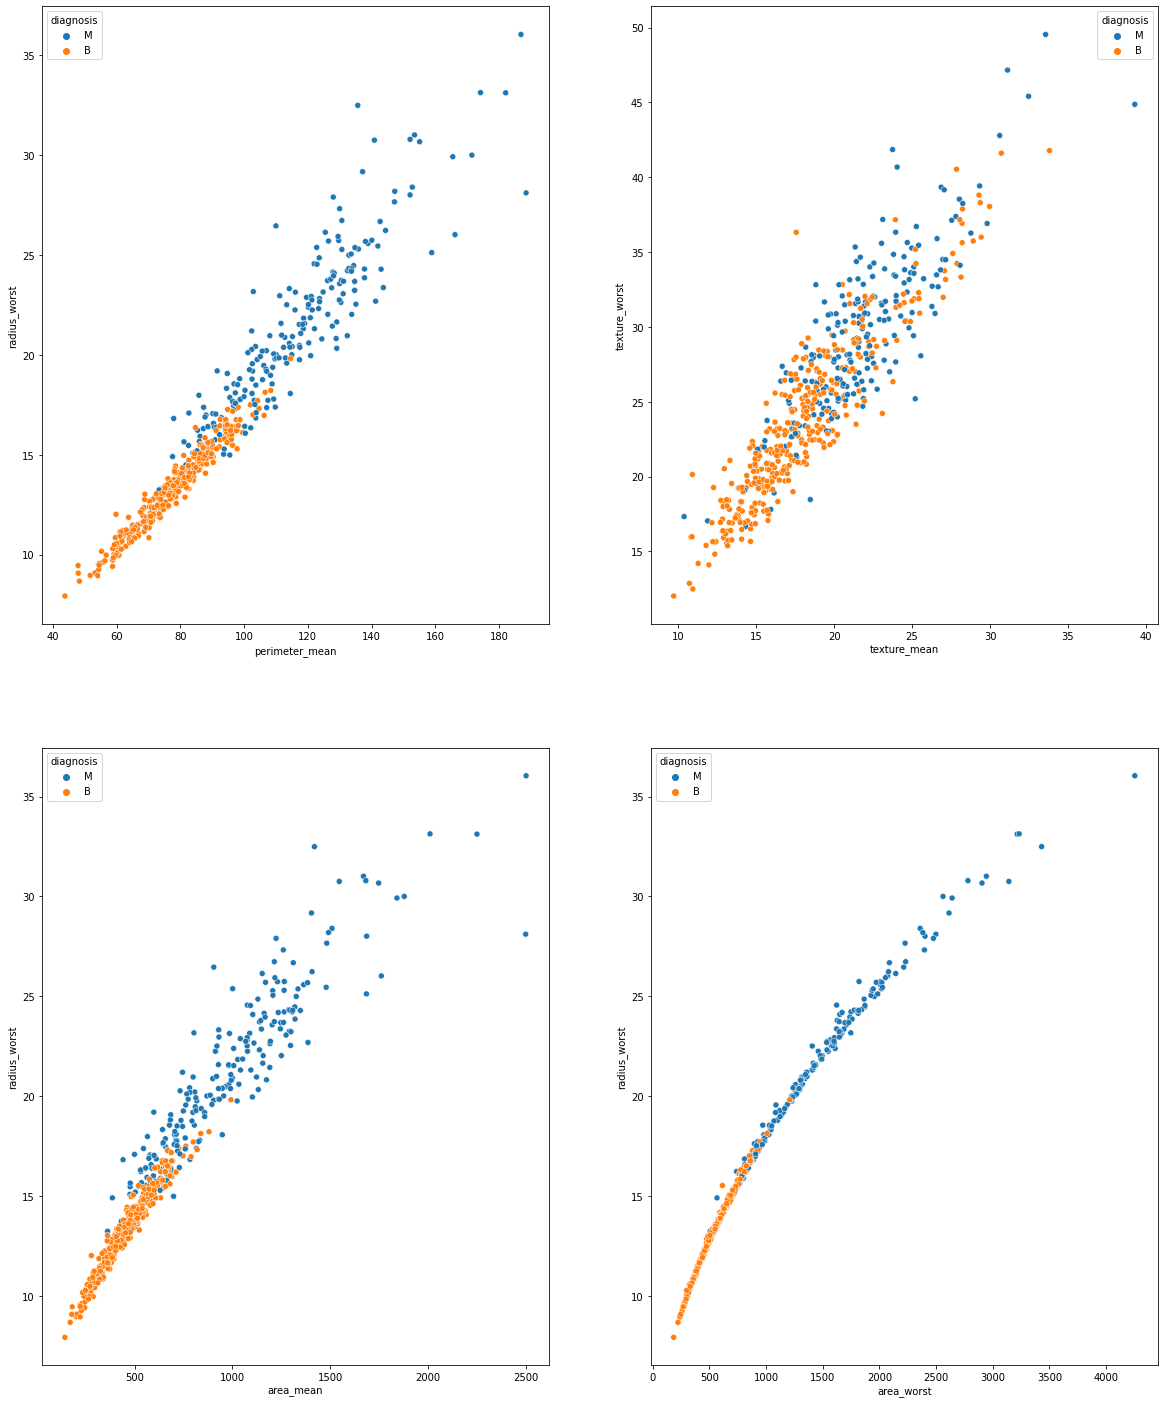

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='perimeter_mean',y='radius_worst',data=data,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_worst',data=data,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='texture_mean',y='texture_worst',data=data,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_worst',y='radius_worst',data=data,hue='diagnosis',ax=ax[1][1])
plt.show()

<Figure size 648x504 with 0 Axes>

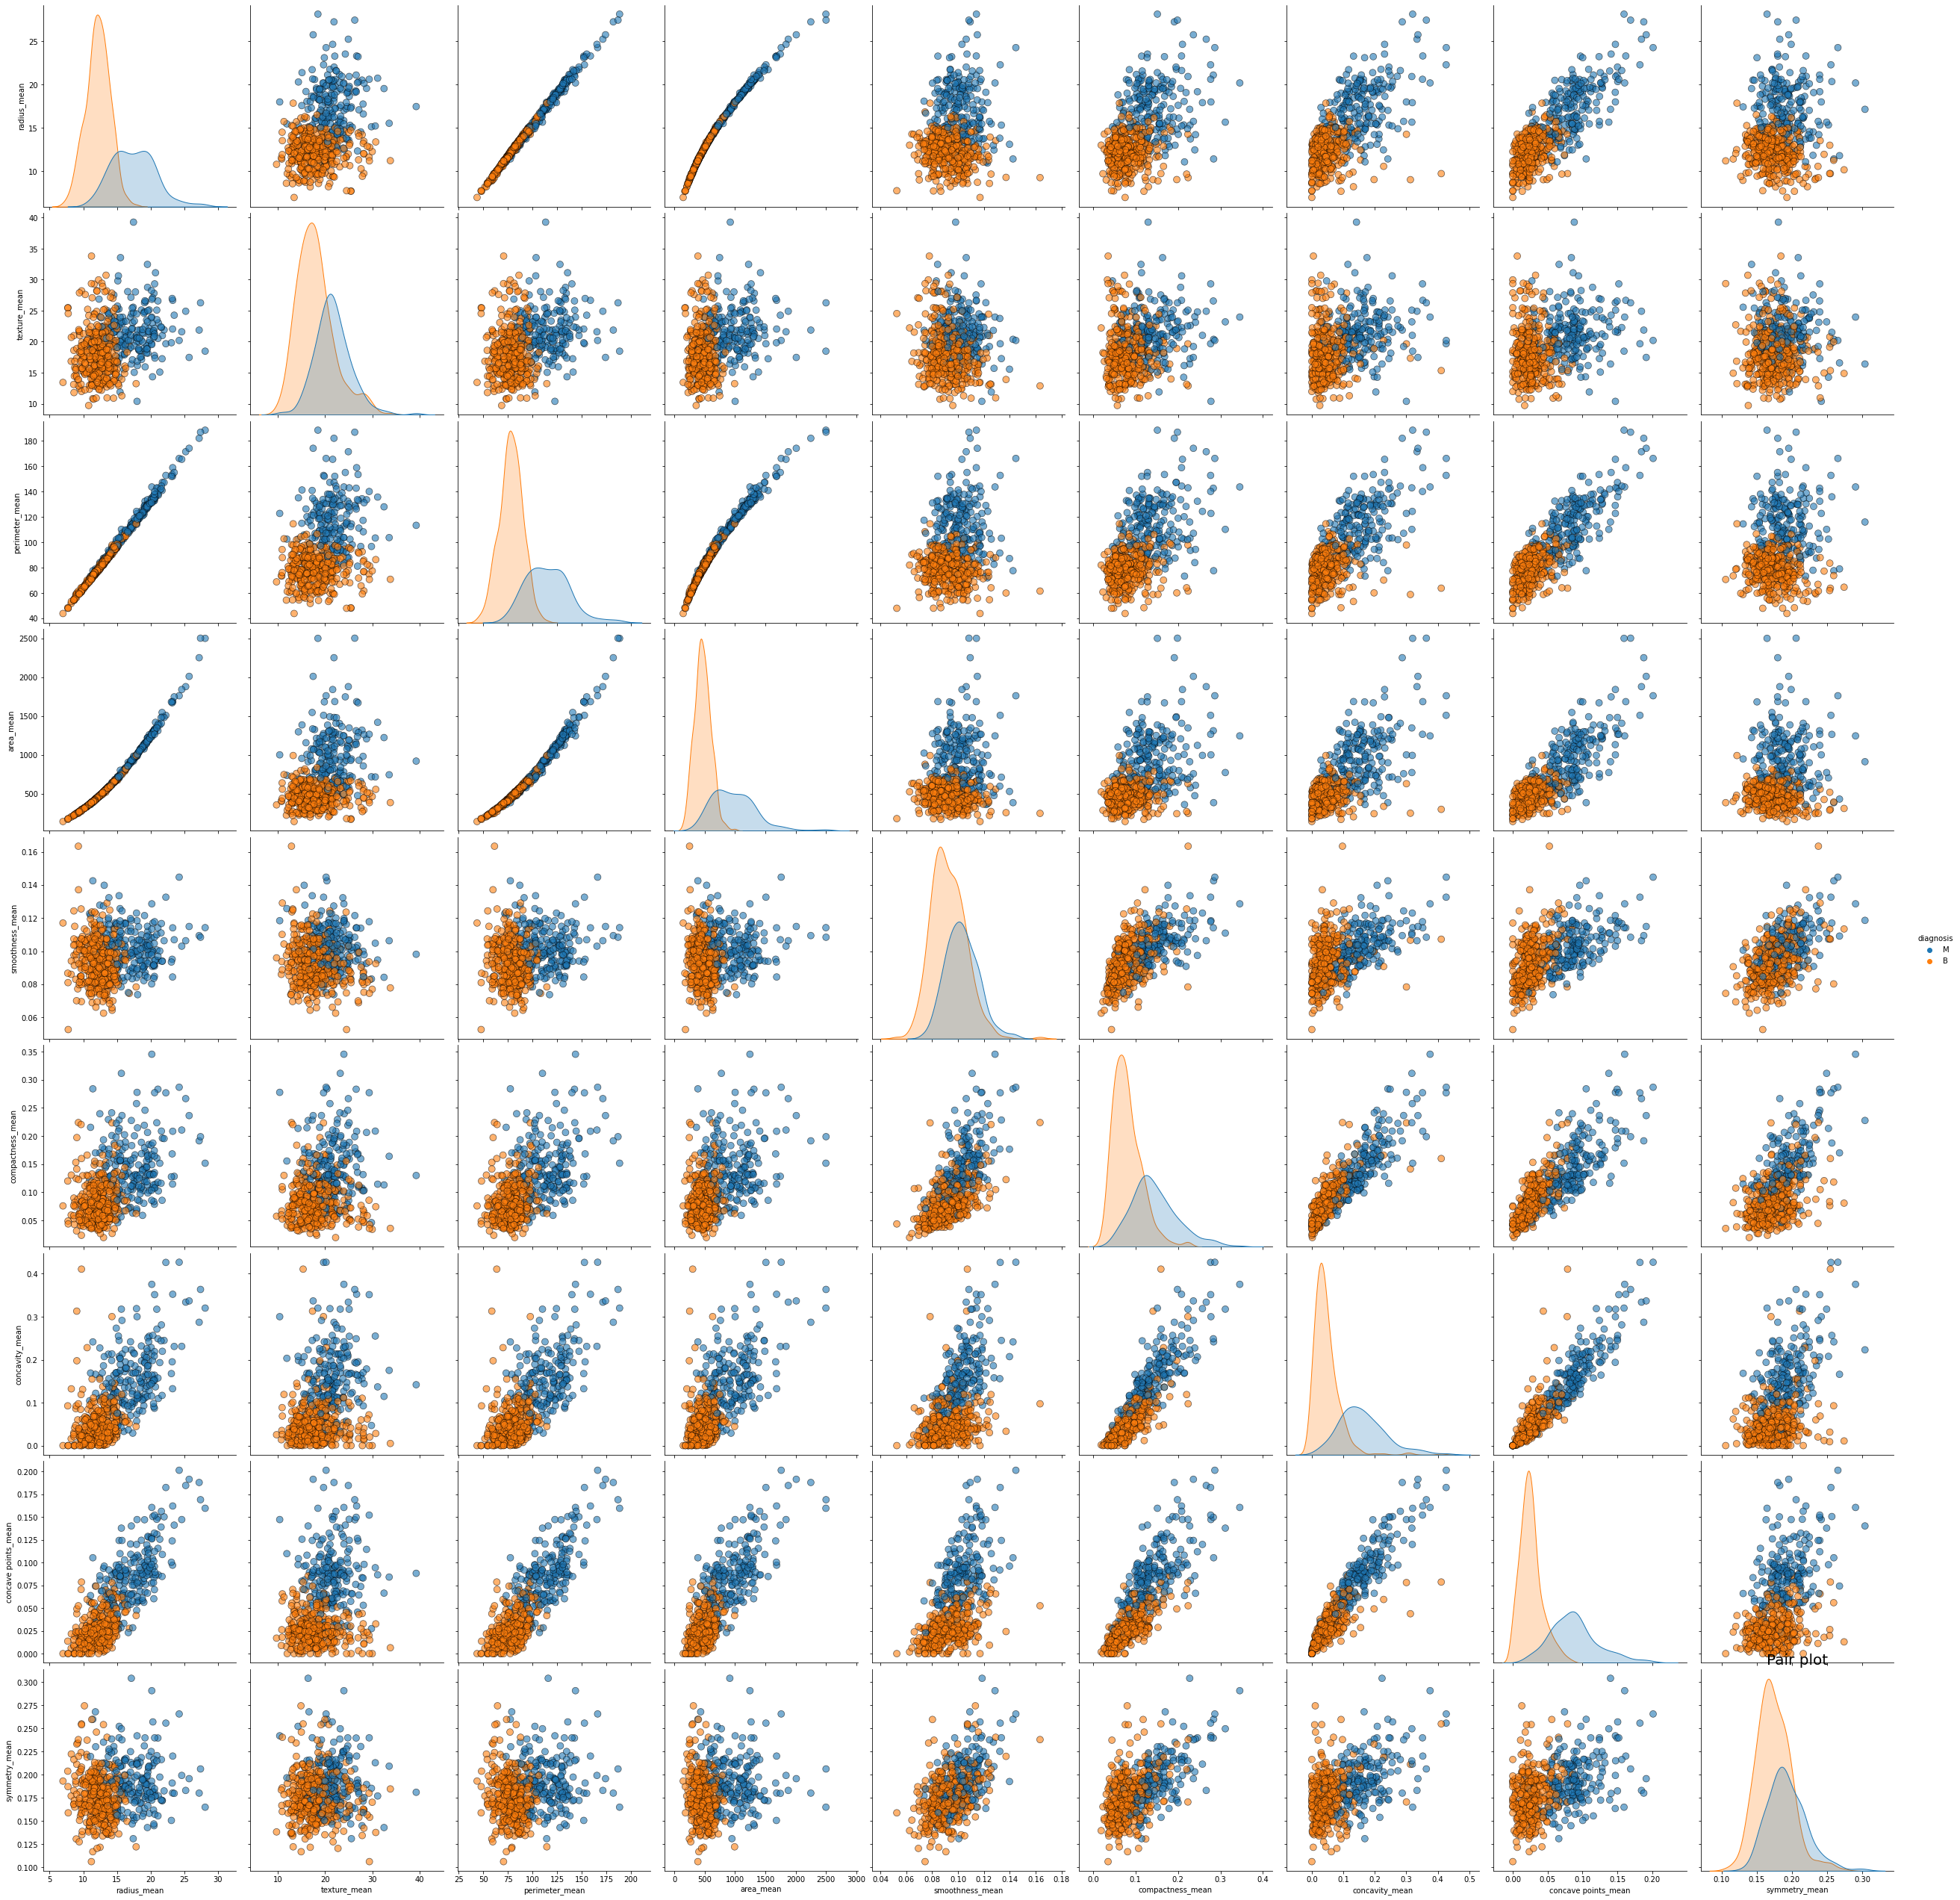

In [11]:
plotters.plot_pair(data.iloc[:, :10], 'Pair plot', hue='diagnosis')

In [12]:
data['prognosis'] = [0] * data.shape[0]
data.loc[data['diagnosis']=="M", "prognosis"] = 1

In [13]:
data.corr()['prognosis']

radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

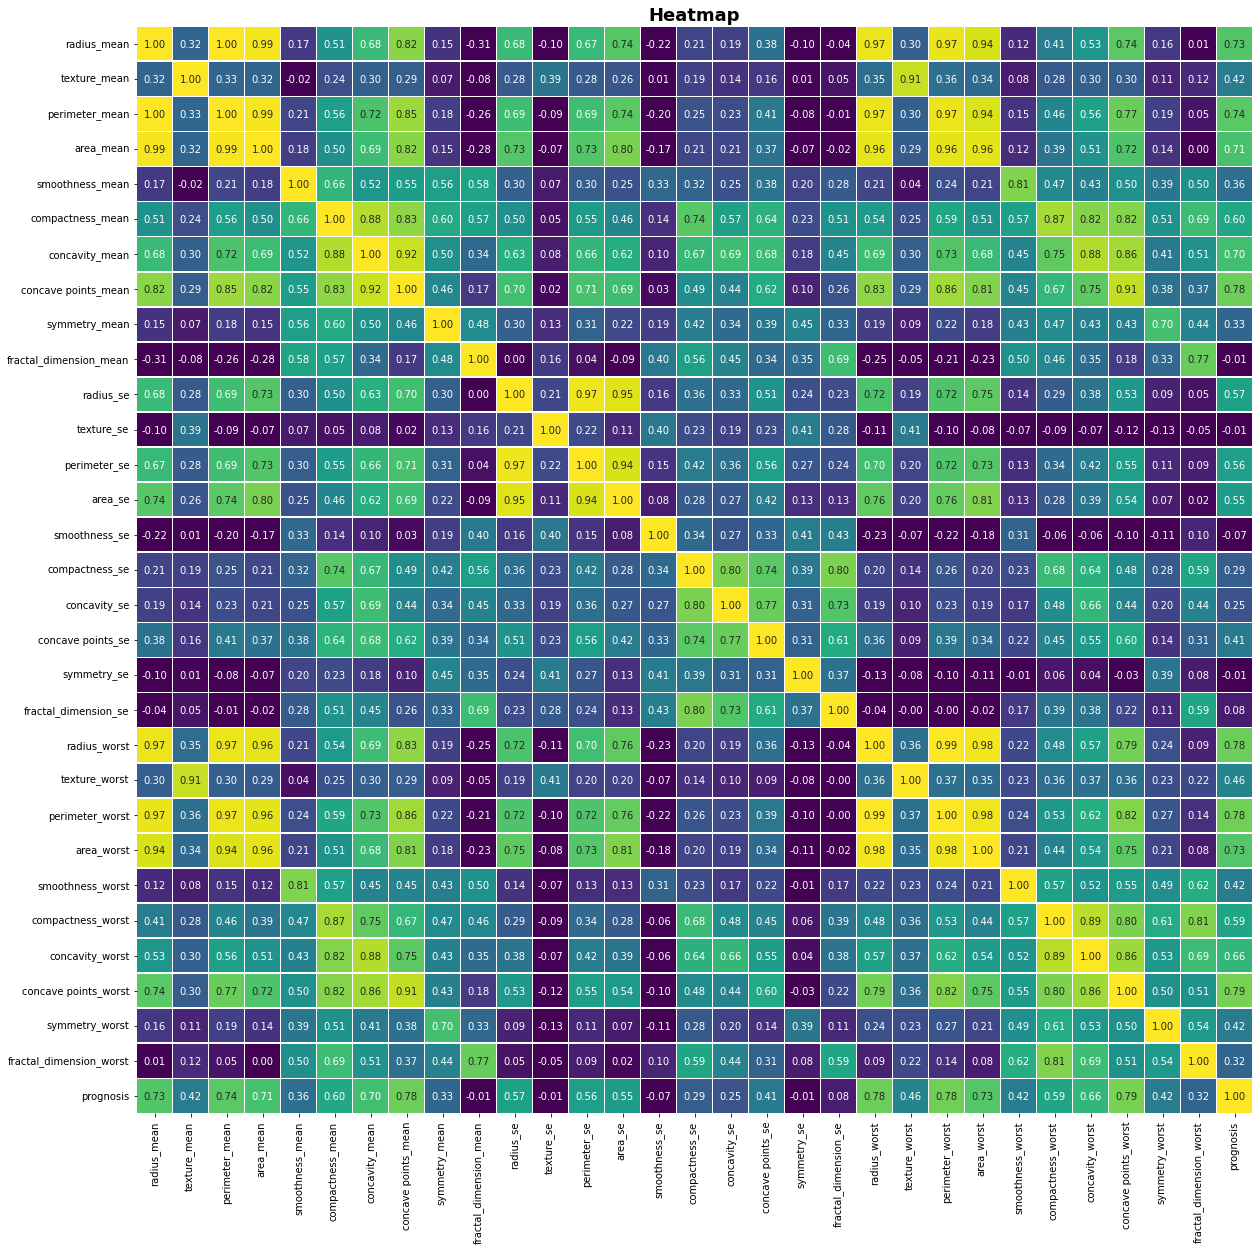

In [14]:
big_plotter = Plotters(w=20, h=20)
big_plotter.plot_heatmap(data.corr(), title="Heatmap")

I can reduce the number of columns by droping the ones that are correlated. 


In [15]:
cols_to_drop = [
    'perimeter_mean',
    'radius_mean',
    'compactness_mean',
    'concave points_mean',
    'radius_se',
    'perimeter_se',
    'radius_worst',
    'perimeter_worst',
    'compactness_worst',
    'concave points_worst',
    'compactness_se',
    'concave points_se',
    'texture_worst',
    'area_worst'
    
]
new_data = data.drop(columns=cols_to_drop)


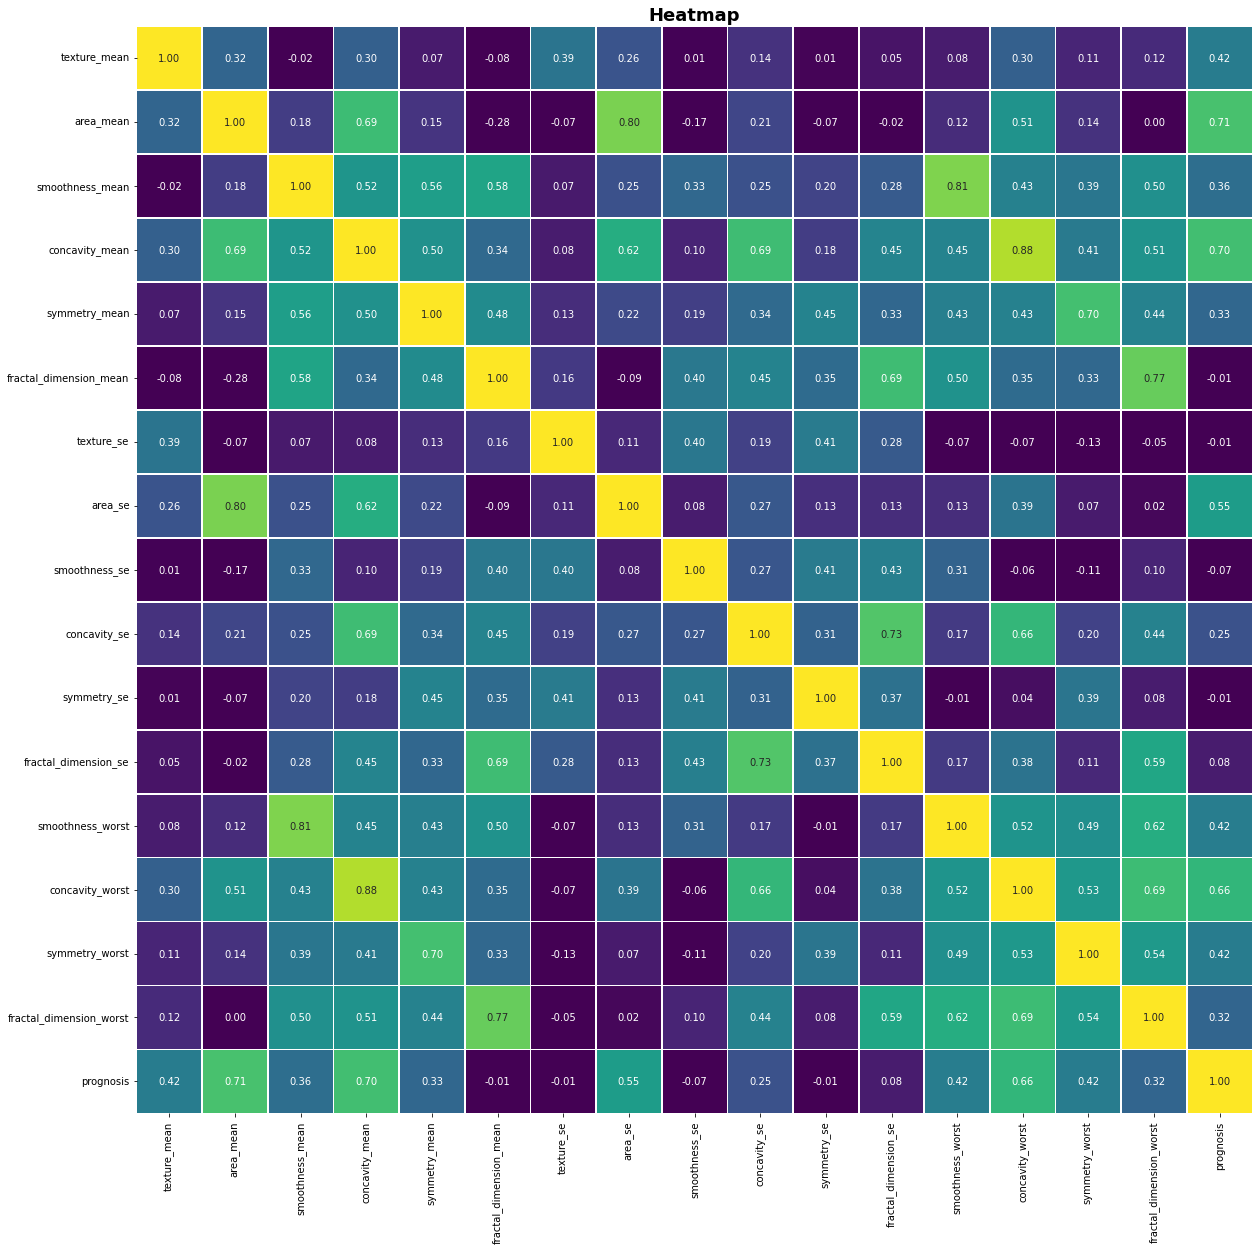

In [16]:
big_plotter.plot_heatmap(new_data.corr(), title="Heatmap")

In [17]:
new_data.describe().T

count        mean         std         min  \
texture_mean             569.0   19.289649    4.301036    9.710000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
concavity_mean           569.0    0.088799    0.079720    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
texture_se               569.0    1.216853    0.551648    0.360200   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
concavity_se             569.0    0.031894    0.030186    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
concavity_worst          569.0    0.272188    0.208624    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   
prognosis                569.0    0.372583    0.483918    0.000000   

                                25%         50%         75%         max  
texture_mean              16.170000   18.840000   21.800000    39.28000  
area_mean                420.300000  551.100000  782.700000  2501.00000  
smoothness_mean            0.086370    0.095870    0.105300     0.16340  
concavity_mean             0.029560    0.061540    0.130700     0.42680  
symmetry_mean              0.161900    0.179200    0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540    0.066120     0.09744  
texture_se                 0.833900    1.108000    1.474000     4.88500  
area_se                   17.850000   24.530000   45.190000   542.20000  
smoothness_se              0.005169    0.006380    0.008146     0.03113  
concavity_se               0.015090    0.025890    0.042050     0.39600  
symmetry_se                0.015160    0.018730    0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187    0.004558     0.02984  
smoothness_worst           0.116600    0.131300    0.146000     0.22260  
concavity_worst            0.114500    0.226700    0.382900     1.25200  
symmetry_worst             0.250400    0.282200    0.317900     0.66380  
fractal_dimension_worst    0.071460    0.080040    0.092080     0.20750  
prognosis                  0.000000    0.000000    1.000000     1.00000

The values are not in the same scale, so there is a need for normalization before moving on to the next steps.

In [20]:
data.diagnosis = data.prognosis


In [21]:
data.drop(columns=['prognosis'], inplace=True)

In [22]:
data.to_csv("../data/data.csv", index=False)